<a href="https://colab.research.google.com/github/Sg134-ch/Machine-Learning-Projects-/blob/main/House_Prices_Advanced_Regression_Techniques_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow v2.19.0
TensorFlow Decision Forests v1.12.0
Please upload train.csv, test.csv, and sample_submission.csv


Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
Full train dataset shape is (1460, 81)

First 3 rows of the dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64 

/tmp/ipython-input-1146481597.py:67: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


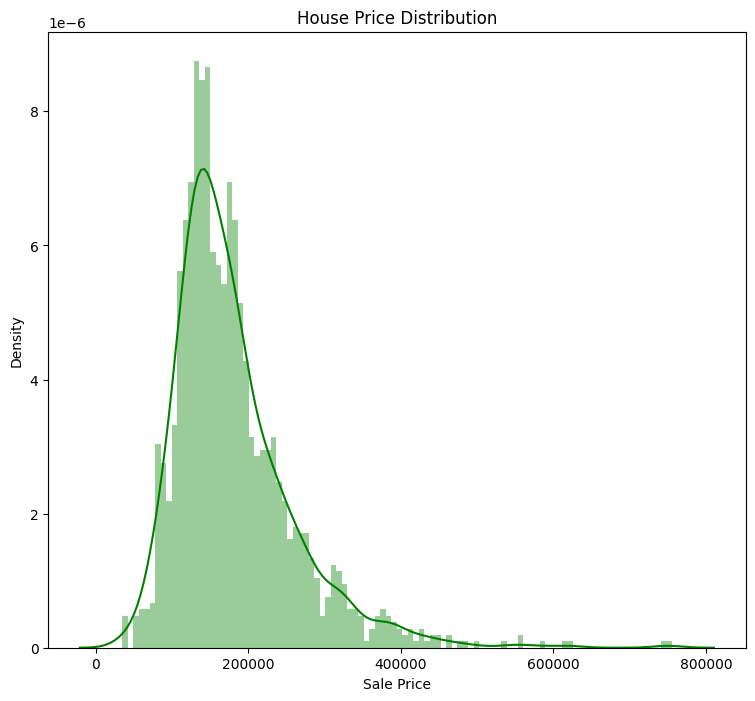


Number of numerical features: 37


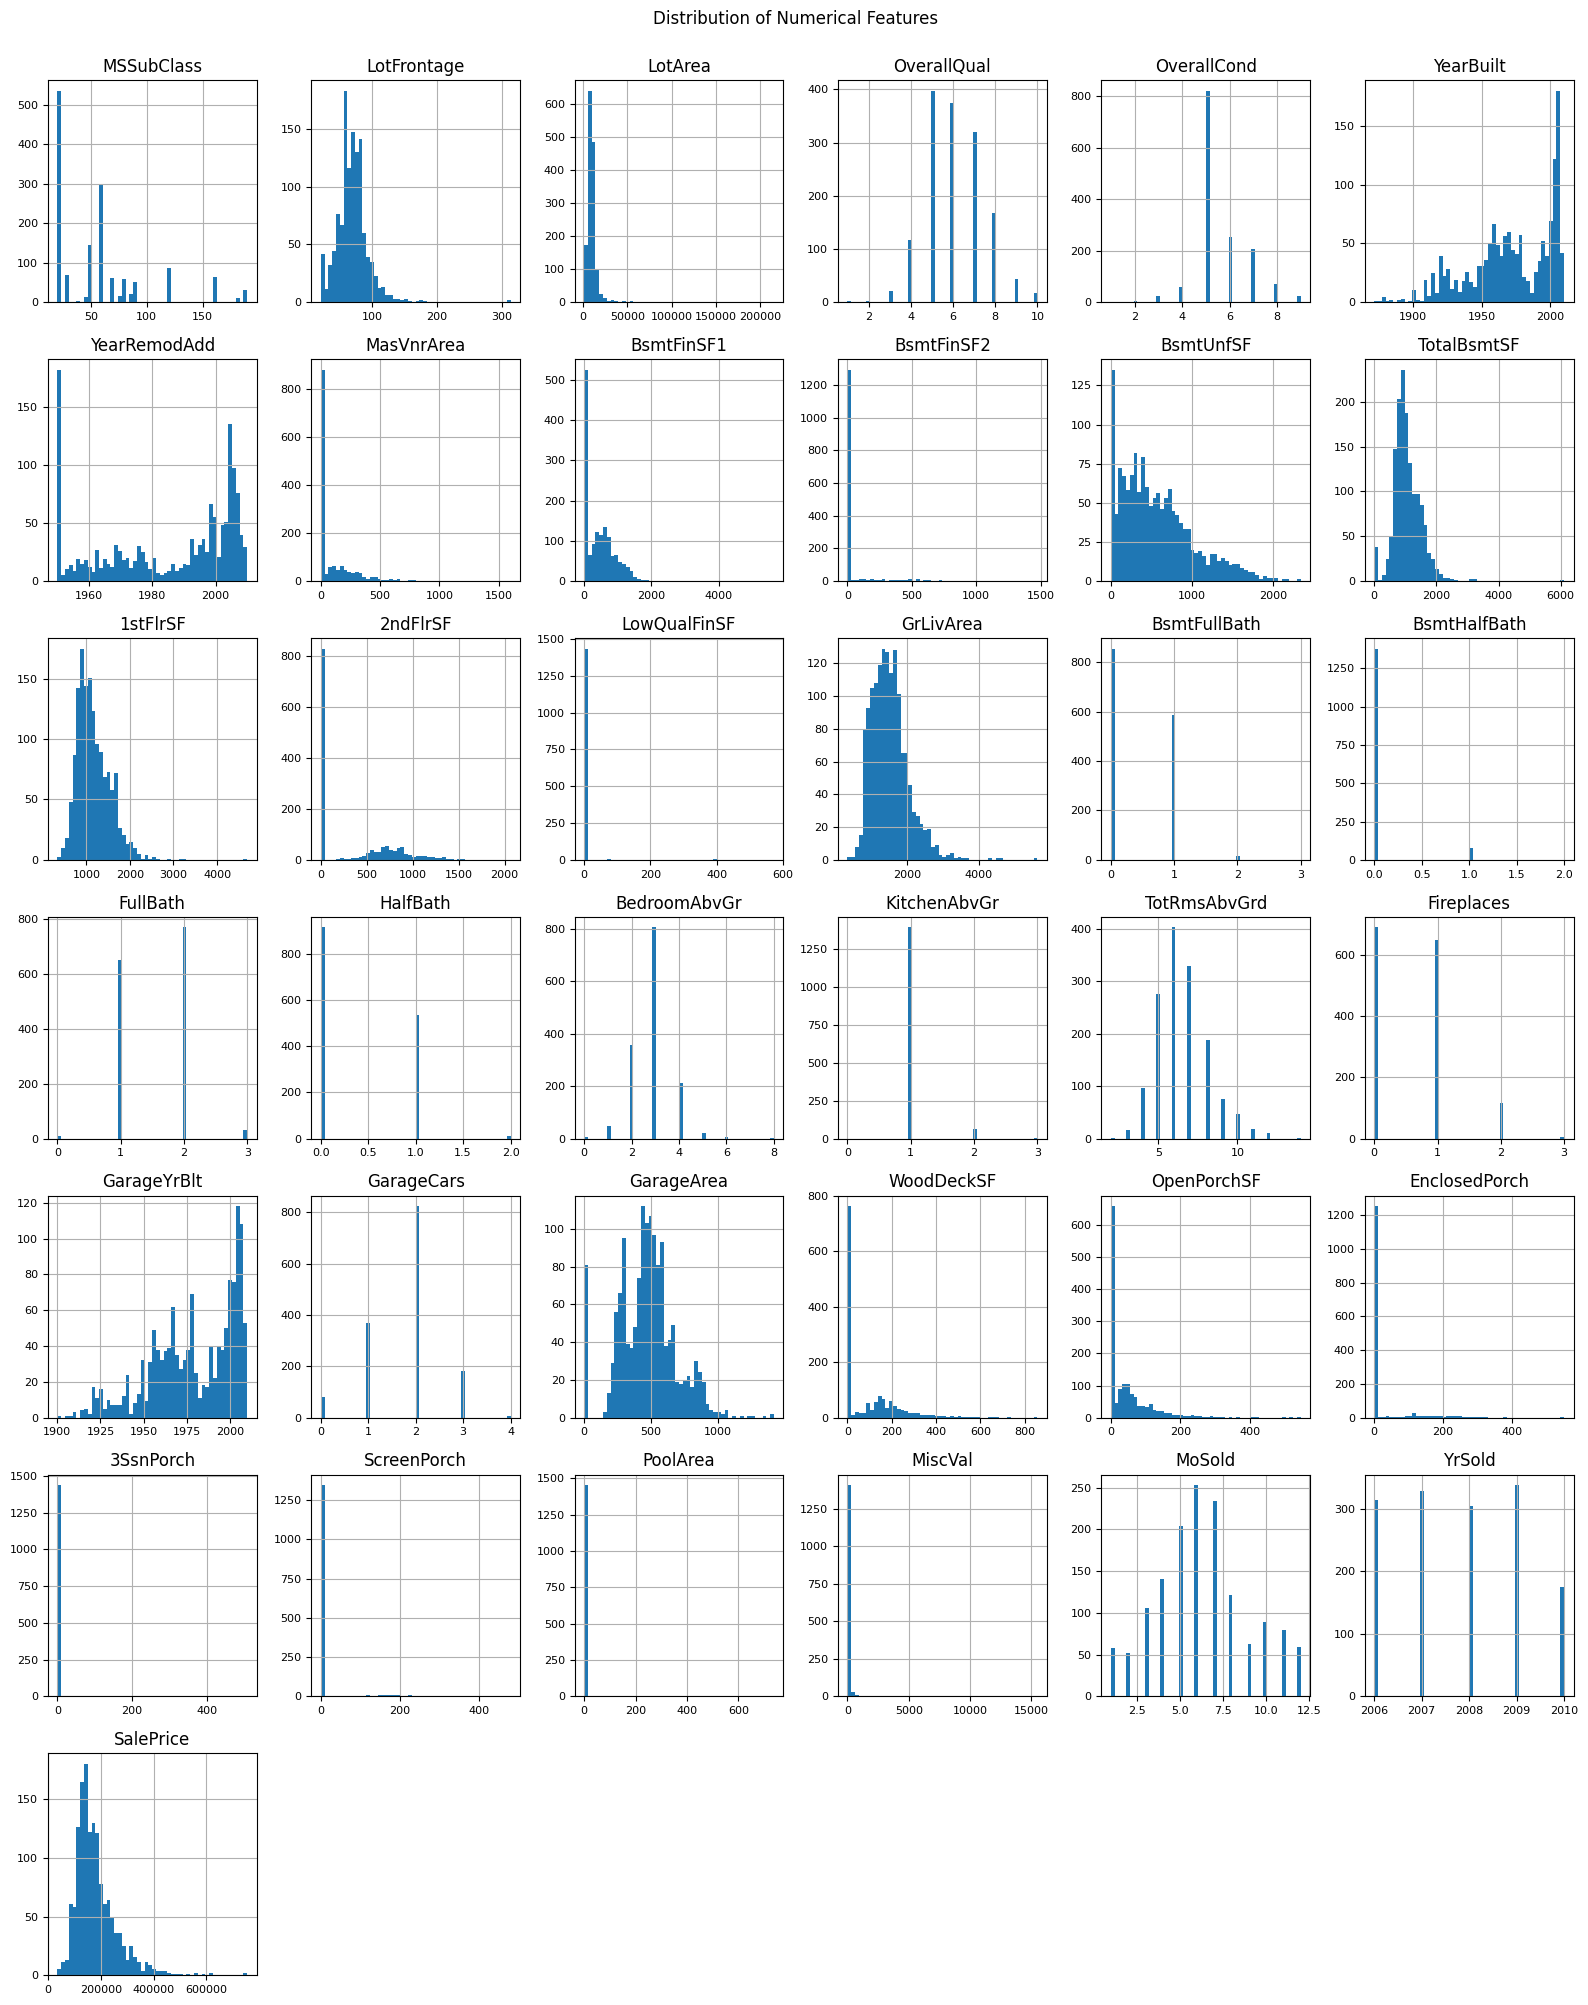


1007 examples in training, 453 examples in validation.

Available TF-DF models:
[<class 'tensorflow_decision_forests.keras.RandomForestModel'>, <class 'tensorflow_decision_forests.keras.GradientBoostedTreesModel'>, <class 'tensorflow_decision_forests.keras.CartModel'>, <class 'tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel'>]

TRAINING RANDOM FOREST MODEL
Use /tmp/tmp35psf7g_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:05.693303. Found 1007 examples.
Training model...
Model trained in 0:00:03.000092
Compiling model...
Model compiled.

Visualizing first tree (limited to depth 3):


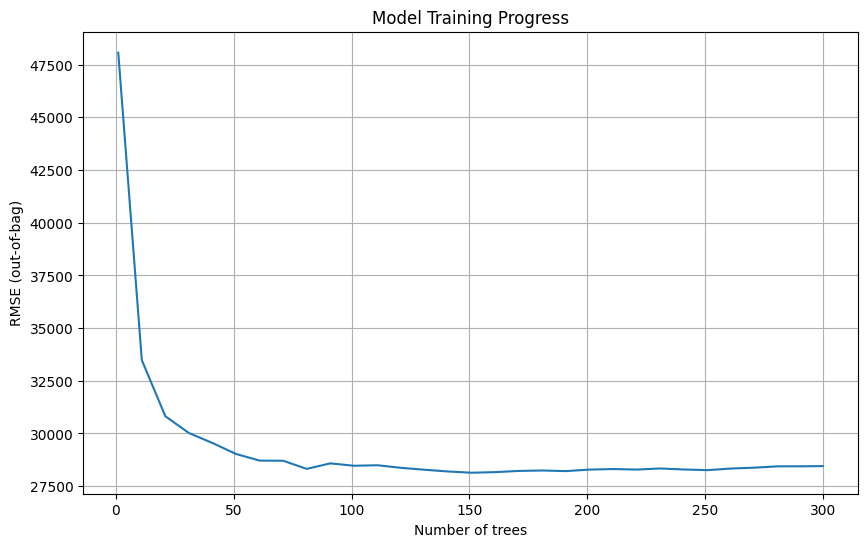


Out-of-Bag Evaluation:
Evaluation(num_examples=1007, accuracy=None, loss=None, rmse=28453.319448989223, ndcg=None, aucs=None, auuc=None, qini=None)

Validation Set Evaluation:
1/1 [==============================] - 1s 667ms/step - loss: 0.0000e+00 - mse: 1055656320.0000
loss: 0.0000
mse: 1055656320.0000

Available variable importances:
  - INV_MEAN_MIN_DEPTH
  - NUM_AS_ROOT
  - SUM_SCORE
  - NUM_NODES

Top features by NUM_AS_ROOT:
  OverallQual: 117.0000
  ExterQual: 60.0000
  Neighborhood: 39.0000
  GarageCars: 21.0000
  YearBuilt: 20.0000
  TotalBsmtSF: 10.0000
  GarageArea: 9.0000
  KitchenQual: 9.0000
  GrLivArea: 7.0000
  BsmtQual: 6.0000


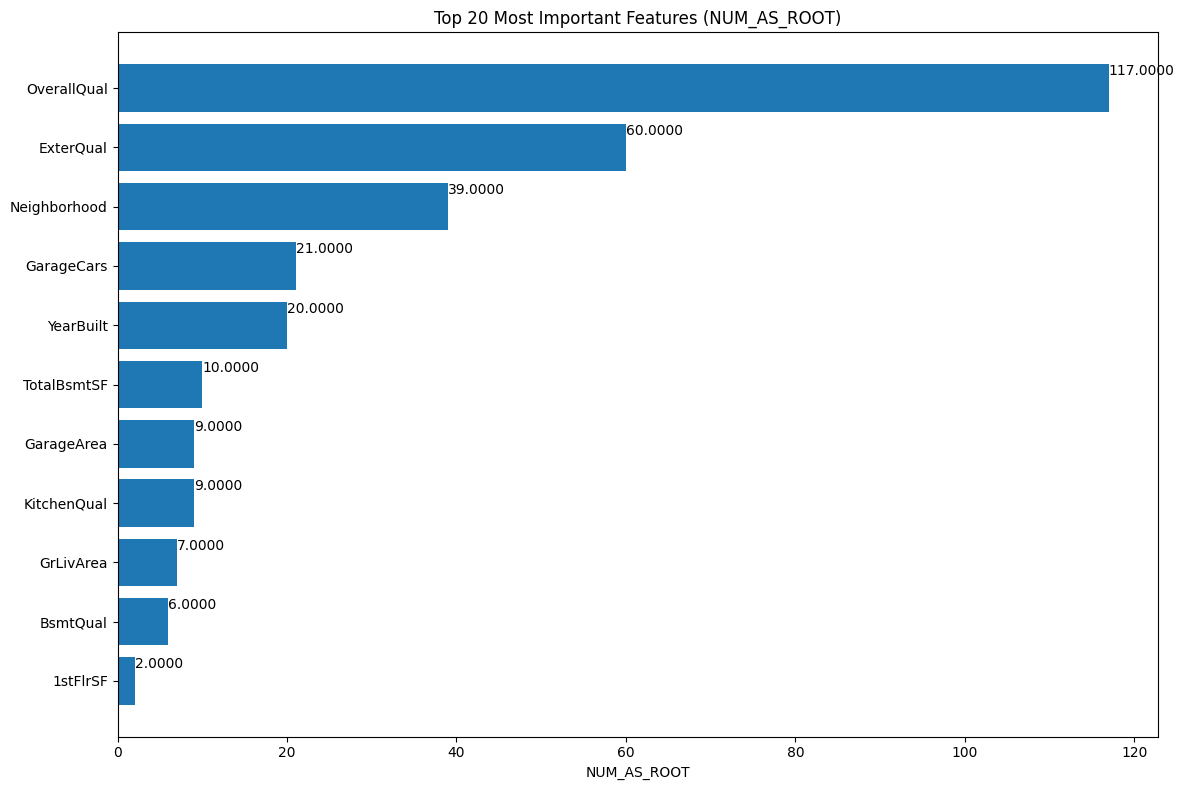


GENERATING PREDICTIONS
2/2 [==============================] - 1s 25ms/step

Prediction sample:


,Id,SalePrice
0,1461,125879.054688
1,1462,154522.984375
2,1463,179560.812500
3,1464,184217.640625
4,1465,193127.546875
5,1466,184057.765625
6,1467,170837.390625
7,1468,176885.218750
8,1469,175458.109375
9,1470,131073.453125



✅ Submission file saved as 'submission.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


MODEL SUMMARY
Training samples: 1007
Validation samples: 453
Test samples: 1459
Number of features: 79
Validation RMSE: 32490.8652

🎉 Training complete! Submit 'submission.csv' to Kaggle.


In [ ]:
# House Prices Prediction using TensorFlow Decision Forests
!pip install tensorflow_decision_forests -q

import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

from google.colab import files
print("Please upload train.csv, test.csv, and sample_submission.csv")
uploaded = files.upload()

train_file_path = "train.csv"
dataset_df = pd.read_csv(train_file_path)
print(f"Full train dataset shape is {dataset_df.shape}")

print("\nFirst 3 rows of the dataset:")
display(dataset_df.head(3))

dataset_df = dataset_df.drop('Id', axis=1)

print("\nDataset Info:")
dataset_df.info()

print("\nSalePrice Statistics:")
print(dataset_df['SalePrice'].describe())

plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('House Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.show()

df_num = dataset_df.select_dtypes(include=['float64', 'int64'])
print(f"\nNumber of numerical features: {len(df_num.columns)}")

# Plot distributions
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.suptitle('Distribution of Numerical Features', y=1.00)
plt.tight_layout()
plt.show()

def split_dataset(dataset, test_ratio=0.30):
    """Split dataset into train and validation sets"""
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

# Split into train and validation
train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print(f"\n{len(train_ds_pd)} examples in training, {len(valid_ds_pd)} examples in validation.")

# Convert to TensorFlow Dataset format
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    train_ds_pd,
    label=label,
    task=tfdf.keras.Task.REGRESSION
)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    valid_ds_pd,
    label=label,
    task=tfdf.keras.Task.REGRESSION
)

print("\nAvailable TF-DF models:")
print(tfdf.keras.get_all_models())

print("\n" + "="*70)
print("TRAINING RANDOM FOREST MODEL")
print("="*70)

# Create the model
rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

# Train the model
rf.fit(x=train_ds)

print("\nVisualizing first tree (limited to depth 3):")
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

logs = rf.make_inspector().training_logs()
plt.figure(figsize=(10, 6))
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.title("Model Training Progress")
plt.grid(True)
plt.show()

inspector = rf.make_inspector()
print("\nOut-of-Bag Evaluation:")
print(inspector.evaluation())

print("\nValidation Set Evaluation:")
evaluation = rf.evaluate(x=valid_ds, return_dict=True)
for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

print("\nAvailable variable importances:")
for importance in inspector.variable_importances().keys():
    print(f"  - {importance}")

print("\nTop features by NUM_AS_ROOT:")
num_as_root = inspector.variable_importances()["NUM_AS_ROOT"]
for feature, importance in num_as_root[:10]:
    print(f"  {feature.name}: {importance:.4f}")

plt.figure(figsize=(12, 8))

variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

feature_names = [vi[0].name for vi in variable_importances[:20]]  # Top 20
feature_importances = [vi[1] for vi in variable_importances[:20]]
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances)
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

for importance, patch in zip(feature_importances, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(),
             f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("Top 20 Most Important Features (NUM_AS_ROOT)")
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("GENERATING PREDICTIONS")
print("="*70)

test_file_path = "test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task=tfdf.keras.Task.REGRESSION
)

preds = rf.predict(test_ds)

output = pd.DataFrame({
    'Id': ids,
    'SalePrice': preds.squeeze()
})

print("\nPrediction sample:")
display(output.head(10))
output.to_csv('submission.csv', index=False)
print("\n✅ Submission file saved as 'submission.csv'")


files.download('submission.csv')
print("\n" + "="*70)
print("MODEL SUMMARY")
print("="*70)
print(f"Training samples: {len(train_ds_pd)}")
print(f"Validation samples: {len(valid_ds_pd)}")
print(f"Test samples: {len(test_data)}")
print(f"Number of features: {len(dataset_df.columns) - 1}")
print(f"Validation RMSE: {evaluation['mse']**0.5:.4f}")
print("="*70)
print("\n🎉 Training complete! Submit 'submission.csv' to Kaggle.")